In [1]:
from keras import datasets,models,layers

Using TensorFlow backend.


In [2]:
(train_data,train_labels),(test_data,test_labels)=datasets.imdb.load_data(num_words=10000)

In [3]:
len(train_data[0])

218

In [4]:
train_labels[0]

1

In [5]:
len(train_data)

25000

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
word_index = datasets.imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [8]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 数据预处理

In [9]:
import numpy as np

In [10]:
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 模型建构

In [14]:
model = models.Sequential()

In [15]:
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [19]:
from keras import losses,optimizers,metrics
model.compile(loss=losses.binary_crossentropy,
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=[metrics.binary_accuracy])

## 验证集

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 431us/step - loss: 0.5180 - binary_accuracy: 0.7834 - val_loss: 0.4189 - val_binary_accuracy: 0.8302
Epoch 2/20
15000/15000 [==============================] - 4s 250us/step - loss: 0.3153 - binary_accuracy: 0.9025 - val_loss: 0.3206 - val_binary_accuracy: 0.8791
Epoch 3/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.2279 - binary_accuracy: 0.9296 - val_loss: 0.2845 - val_binary_accuracy: 0.8899
Epoch 4/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.1785 - binary_accuracy: 0.9461 - val_loss: 0.2749 - val_binary_accuracy: 0.8908
Epoch 5/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.1454 - binary_accuracy: 0.9561 - val_loss: 0.2937 - val_binary_accuracy: 0.8847
Epoch 6/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1216 - binary_accuracy: 0.9632 - val_loss: 0.2953 - val_bi

In [22]:
type(history)

keras.callbacks.callbacks.History

In [23]:
type(history.history)

dict

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

## 画画结果,看看情况

In [25]:
import matplotlib.pyplot as plt

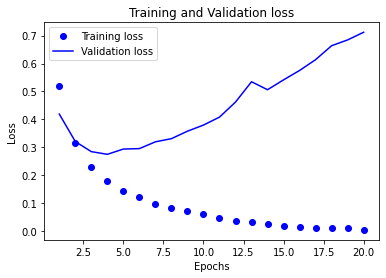

In [26]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,21)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

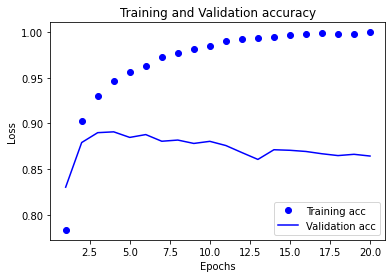

In [27]:
plt.clf()
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 第四轮之后开始过拟合,限定 epoch

In [28]:
model = models.Sequential()

In [29]:
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu',))
model.add(layers.Dense(1,activation='sigmoid'))

In [30]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [31]:
model.fit(x_train,y_train,epochs=4,batch_size=512)#注意是在全部训练数据上进行训练

Epoch 1/4
25000/25000 [==============================] - 6s 221us/step - loss: 0.4645 - binary_accuracy: 0.8222
Epoch 2/4
25000/25000 [==============================] - 4s 160us/step - loss: 0.2658 - binary_accuracy: 0.9073
Epoch 3/4
25000/25000 [==============================] - 4s 180us/step - loss: 0.2059 - binary_accuracy: 0.9279
Epoch 4/4
25000/25000 [==============================] - 6s 233us/step - loss: 0.1679 - binary_accuracy: 0.9407 3s - lo


In [32]:
results = model.evaluate(x_test,y_test)

25000/25000 [==============================] - 7s 273us/step


In [33]:
results

[0.293271095123291, 0.88264000415802]

In [ ]:
model.pre